In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
adv_df=pd.read_csv(r"C:\Users\Subhanghi\Downloads\advertising.csv")

In [5]:
adv_df.head(50)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [8]:
adv_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
adv_df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_18240\3308574815.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (adv_df['TV'])


<Axes: xlabel='TV', ylabel='Density'>

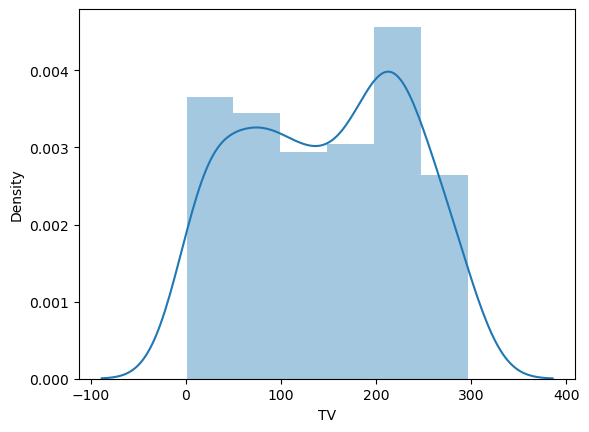

In [9]:
sns.distplot (adv_df['TV'])

C:\Users\Subhanghi\AppData\Local\Temp\ipykernel_18240\4115483946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (adv_df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

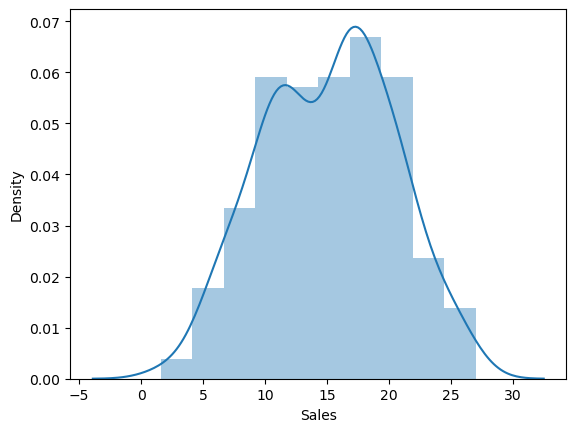

In [10]:
sns.distplot (adv_df['Sales'])

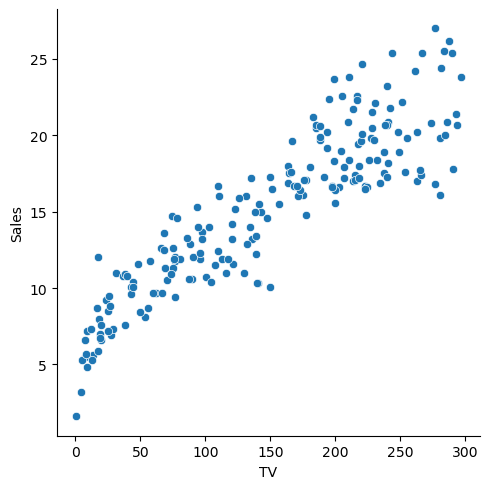

In [11]:
sns.relplot(x="TV",y="Sales",data= adv_df)

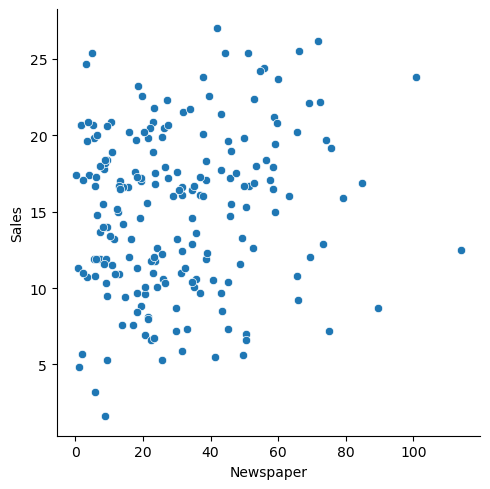

In [27]:
sns.relplot(x="Newspaper",y="Sales",data= adv_df)

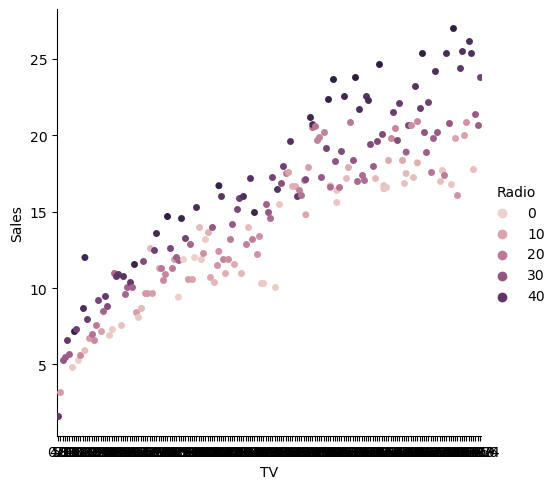

In [14]:
sns.catplot(x="TV",y="Sales", hue="Radio",data=adv_df)  ## radio has weak relationship 

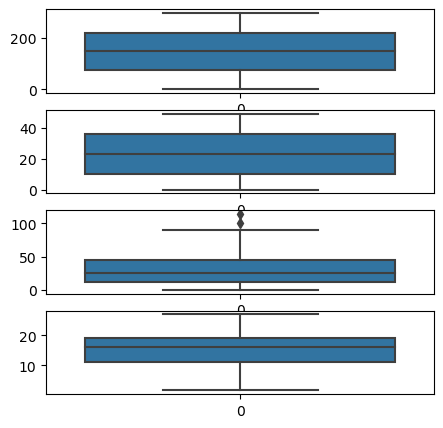

In [25]:
fig,axes=plt.subplots(4,figsize=(5,5))
plt1=sns.boxplot(adv_df["TV"],ax=axes[0])
plt2=sns.boxplot(adv_df["Radio"],ax=axes[1])
plt3=sns.boxplot(adv_df["Newspaper"],ax=axes[2])
plt4=sns.boxplot(adv_df["Sales"],ax=axes[3])

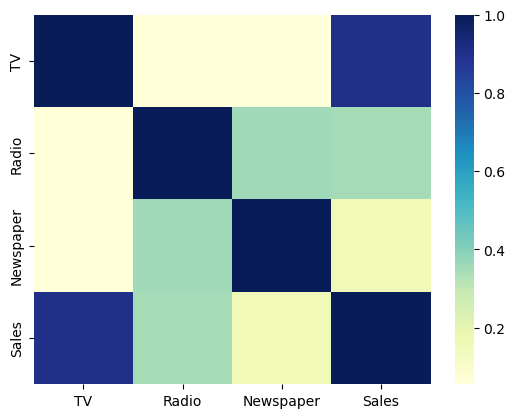

In [26]:
sns.heatmap(adv_df.corr(),cmap='YlGnBu')
plt.show()

In [30]:
x=adv_df.iloc[:,0:3]
y=adv_df.iloc[:,3:4]

In [33]:
type(x)

pandas.core.frame.DataFrame

In [34]:
x=adv_df.iloc[:,0:3].values
y=adv_df.iloc[:,3:4].values

In [35]:
type(x)

numpy.ndarray

In [36]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [38]:
X_test.shape

(40, 3)

In [42]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train) ## feature scaling
X_test=sc.fit_transform(X_test)

In [44]:
linear=LinearRegression()
linear.fit(X_train,Y_train)

LinearRegression()

In [45]:
Y_pred=linear.predict(X_test)
Y_pred

array([[11.85347427],
       [ 9.90588017],
       [10.76558383],
       [25.4808191 ],
       [15.65528291],
       [ 9.55629711],
       [11.58893696],
       [19.30070192],
       [10.9182702 ],
       [18.80314052],
       [24.04456877],
       [11.82536588],
       [14.48233323],
       [18.0759572 ],
       [12.8777854 ],
       [14.41451549],
       [22.00875284],
       [10.39418189],
       [15.14925121],
       [19.76278563],
       [25.38009928],
       [13.56253618],
       [17.49795821],
       [14.80493919],
       [ 9.04685529],
       [16.17131801],
       [15.71111771],
       [21.50713724],
       [17.92031345],
       [10.05064533],
       [13.19603579],
       [21.52129568],
       [22.014685  ],
       [22.63021387],
       [ 8.36349314],
       [ 8.32558497],
       [10.36424063],
       [16.44921208],
       [14.33087568],
       [ 8.51255875]])

In [46]:
Y_test

array([[11.3],
       [ 8.4],
       [12. ],
       [25.4],
       [16.7],
       [ 8.7],
       [ 7.2],
       [18.2],
       [ 9.2],
       [16.6],
       [24.2],
       [10.6],
       [15.5],
       [20.6],
       [11.8],
       [13.2],
       [17.4],
       [ 1.6],
       [14.7],
       [17. ],
       [26.2],
       [10.3],
       [16.1],
       [12.9],
       [ 8.1],
       [15.2],
       [17.6],
       [22.6],
       [16.6],
       [ 8.5],
       [12.5],
       [23.7],
       [16.1],
       [21.8],
       [ 5.6],
       [ 6.7],
       [ 9.7],
       [17.9],
       [13.6],
       [ 7.2]])

In [47]:
X_test

array([[-0.72685844, -0.14851009, -0.60786277],
       [-0.9451206 , -0.73141627, -0.60351079],
       [-0.48586065, -1.47151064, -0.39461576],
       [ 1.77974598,  1.27928259,  0.82393857],
       [ 0.42129143, -0.98029756,  0.12762181],
       [-0.87464011, -1.11783722, -0.11173708],
       [-1.41461158,  1.71155009,  1.85970975],
       [ 1.21590208, -1.0130451 , -1.02565283],
       [-1.24295749,  0.80771803,  1.46367959],
       [ 0.73276971,  0.03487613, -0.78629394],
       [ 1.45689988,  1.30548062,  0.97625786],
       [-0.52223767, -0.71831725, -0.27711231],
       [ 0.26668907, -1.32087196, -1.04306075],
       [ 0.62136507, -0.10921304, -0.99083699],
       [-0.64501014,  0.25755939, -0.43378358],
       [-0.1470996 , -0.20745566, -0.89944542],
       [ 1.5057815 , -0.18125762, -1.39121913],
       [-1.50555415,  1.10244588, -1.02565283],
       [-0.66433543,  1.74429763,  0.58457968],
       [ 0.91238127,  0.12001973, -0.83416572],
       [ 1.75587355,  1.32512914,  1.720

In [49]:
accuracy=r2_score(Y_test,Y_pred)

In [50]:
accuracy

0.8233668011989852

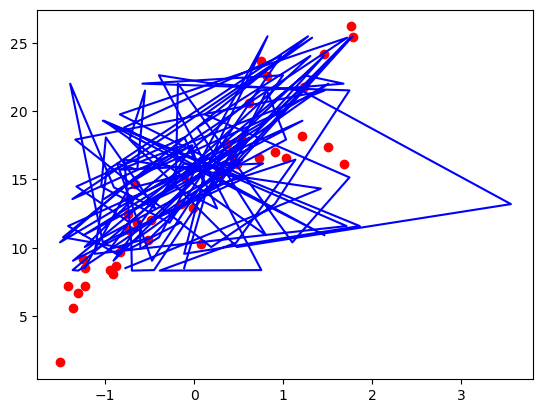

In [57]:
plt.scatter(X_test[:,0],Y_test,color='red')
plt.plot(X_test,linear.predict(X_test),color='blue')

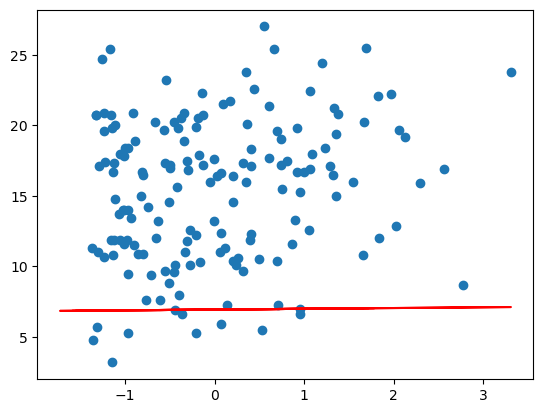

In [61]:
plt.scatter(X_train[:,2], Y_train)
plt.plot(X_train, 6.948 + 0.054 * X_train, 'r')
plt.show()